In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tx_deaths = pd.read_csv("05_cleaned_data/deaths_tx.csv")
tx_prescriptions = pd.read_csv("05_cleaned_data/prescriptions_tx.csv")

In [4]:
## filter to only texas (only for pre-post)

tx_deaths = tx_deaths[tx_deaths["StateName"] == "Texas"]
tx_prescriptions = tx_prescriptions[tx_prescriptions["BUYER_STATE"] == "TX"]

### helper functions 

In [7]:
# function to select only overdose records
# double check this

def select_overdose(record):

    if record == "All other non-drug and non-alcohol causes":
        return 0

    if record == "All other alcohol-induced causes":
        return 0

    if record == "All other drug-induced causes":
        return 0

    if record == "Alcohol poisonings (overdose) (X45, X65, Y15)":
        return 0

    if record == "Drug poisonings (overdose) Unintentional (X40-X44)":
        return 1

    if record == "Drug poisonings (overdose) Suicide (X60-X64)":
        return 1

    if record == "Drug poisonings (overdose) Undetermined (Y10-Y14)":
        return 1

    else:
        return "error"
    

tx_deaths["overdose"] = tx_deaths["Drug/Alcohol Induced Cause"].apply(lambda x: select_overdose(x))


# filter accordingly
tx_deaths = tx_deaths[tx_deaths["overdose"] != 0]

In [8]:
# normalize deaths over population

tx_deaths["overdose_per_100k"] = tx_deaths["Deaths"] / tx_deaths["Population"] * 100_000

In [9]:
tx_result = tx_deaths.groupby("Year")["overdose_per_100k"].sum().reset_index()

In [15]:
# create a scale for number of years before and after 2007 (target year)

def scale_years(year):
    if year == 2004:
        return -3
    if year == 2005:
        return -2
    if year == 2006:
        return -1
    if year == 2007:
        return 0
    if year == 2008:
        return 1
    if year == 2009:
        return 2
    if year == 2010:
        return 3

tx_result["year relative to policy"] = tx_result["Year"].apply(lambda x: scale_years(x))


# double check no nulls in "year relative to policy"

assert (tx_result["year relative to policy"].isnull().sum() == 0)

# doing this in case the float == int comparison causes issues

In [16]:
tx_result

,Year,overdose_per_100k,year relative to policy
0,2004.0,210.676289,-3
1,2005.0,248.943355,-2
2,2006.0,423.517095,-1
3,2007.0,280.969382,0
4,2008.0,371.347741,1
5,2009.0,404.855060,2
6,2010.0,426.309075,3


## Pre-post plot - overdoses per 100k through the years

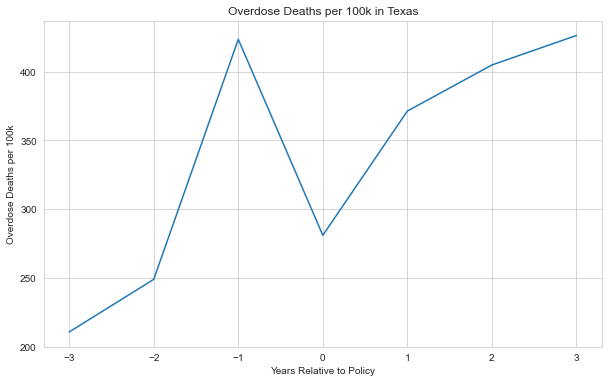

In [17]:
# plot years relative to policy vs. overdose per 100k

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x="year relative to policy", y="overdose_per_100k", data=tx_result)
plt.title("Overdose Deaths per 100k in Texas")
plt.xlabel("Years Relative to Policy")
plt.ylabel("Overdose Deaths per 100k")
plt.show()


## Pre-post plot - overdoses per 100k through the years

In [24]:
tx_prescriptions.groupby(["Year", "Month"])["BUYER_COUNTY"].count().reset_index()

,Year,Month,BUYER_COUNTY
0,2006.0,1.0,4
1,2006.0,2.0,3
2,2006.0,3.0,11
3,2006.0,4.0,3
4,2006.0,5.0,1
5,2006.0,6.0,6
6,2006.0,7.0,9
7,2006.0,8.0,9
8,2006.0,9.0,6
9,2006.0,10.0,15


In [18]:
tx_prescriptions["prescriptions per 100k"] = tx_prescriptions["overdoses"] / tx_prescriptions["population"] * 100_000

,BUYER_COUNTY,BUYER_STATE,Year,Month,StateFIPS,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,state_abbrev,FIP_unique,State,Population,county_test
0,gregg,TX,2006.0,1.0,48,gregg,Texas,48183,TX,TX | GREGG,TX,4818348,TX,117118.0,Gregg
1,gregg,TX,2009.0,4.0,48,gregg,Texas,48183,TX,TX | GREGG,TX,4818348,TX,121238.0,Gregg
2,gregg,TX,2009.0,4.0,48,gregg,Texas,48183,TX,TX | GREGG,TX,4818348,TX,121238.0,Gregg
3,gregg,TX,2009.0,9.0,48,gregg,Texas,48183,TX,TX | GREGG,TX,4818348,TX,121238.0,Gregg
4,gregg,TX,2008.0,6.0,48,gregg,Texas,48183,TX,TX | GREGG,TX,4818348,TX,119157.0,Gregg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14016,panola,TX,2008.0,9.0,48,panola,Texas,48365,TX,TX | PANOLA,TX,4836548,TX,23537.0,Panola
14017,liberty,TX,2008.0,5.0,48,liberty,Texas,48291,TX,TX | LIBERTY,TX,4829148,TX,74915.0,Liberty
14018,liberty,TX,2008.0,9.0,48,liberty,Texas,48291,TX,TX | LIBERTY,TX,4829148,TX,74915.0,Liberty
14019,fayette,TX,2008.0,12.0,48,fayette,Texas,48149,TX,TX | FAYETTE,TX,4814948,TX,24347.0,Fayette
